In [1]:
import glob

clean_files = sorted(glob.glob('/home/spenteco/Downloads/test_xml/*.xml'))

print(len(clean_files))

37


In [2]:
import re
from lxml import etree
from nltk.corpus import stopwords

sw = set(stopwords.words('french') + ['ici', 'là', 'elles', 'trop', 'tous', 'selon', 'presque', 'tant', 
                                      'fois', 'quant', 'ainsi', 'cette', 'doit', 'tout', 'bien', 'toute', 
                                      'si', 'autre', 'sans', 'comment', 'rien', 'là', 'peu', 'mêmes', 'si', 
                                      'plutôt', 'ceux', 'faire', 'moins', 'être', 'faudra', 
                                      'deux', 'a', 'paris', 'plus', 'où', 'saint', 'cette'])

def is_number(w):

    result = False
    
    try:
        n = int(w)
        result = True
    except ValueError:
        pass
    
    return result

def is_t_valid(t):
    
    terms_to_find= [r'Notre-\s*Dame', 'Cité', 'Saint-\s*Louis', 'Arènes', 
        r'Palais\s*de\s*Justice|Palais-\s*de-\s*Justice',
        'Morgue', r'Sainte-\s*Chapelle', 'Conciergerie', r'[Qq]uai\s*de\s*l\'Horloge', r'Pont-\s*Neuf', r'Cluny|Thermes',
        r'Saint-\s*Germain-\s*des-\s*Prés', 'Nesle', r'[Ss]aint-\s*Sulpice', r'[Pp]alais\s*du\s* Luxembourg', 
        r'[Jj]ardin\s*du\s*Luxembourg', 'Observatoire', r'Panthéon|Sainte-\s*Geneviève', r'[Eéeé]glise\s*Saint-\s*Étienne',
        'Odéon', r'[Jj]ardin\s*des\s*Plantes', 'Gobelins', 'Auxerrois', 'Louvre', r'Carrousel|Doyenné', 'Tuileries', 
        r'Palais-\s*Royal', r'Comédie-\s*Française', 'Bourse', 'Innocents', 'Halles', r'Saint-\s*Eustache', 'Temple',
        r'[Tt]our\s*Saint-\s*Jacques', r'H[oôóòö]tel\s*de\s*Ville|Gr[eêéèë]ve', 'Rivoli', 
        r'Bastille|[Cc]olonne\s*de\s*Juillet', 'Tournelles', r'[Bb]oulevar[dt]\s*de\s*la\s*Madeleine', 'Capucines',
        r'[Bb]oulevard\s*des\s*Italiens', r'[Bb]oulevar[dt]\s*Montmartre', r'[Bb]oulevar[dt]\s*Poissonnière',
        r'[Bb]oulevar[dt]\s*Bonne-\s*Nouvelle', r'[Bb]oulevar[dt]\s*Saint-\s*Denis', r'[Bb]oulevar[dt]\s*Saint-\s*Martin',
        r'[Bb]oulevar[dt]\s*du\s*Temple|[Bb]oulevard\s*du\s*crime', r'[Bb]oulevar[dt]\s*des\s*Filles', 'Beaumarchais',
        r'[Pp]orte\s*Saint-Denis', r'[Cc]afé\s*Tortoni', r'[Cc]afé\s*Anglais', 'Maison-\s*Dorée', 
        r'Notre-\s*Dame-\s*de-\s*Lorette', 'Opéra-\s*[Cc]omique', 'Panorama', 'Opéra', r'[Aa]venue\s*\s*de\s*l’Op[eé]ra',
        r'[Rr]ue\s*de\s*la\s*Paix|[Rr]ue\s*\de\s* Napoléon', 'Vivienne', r'[Rr]ue\s*Saint-\s*Jacques', 
        r'[Rr]ue\s*Saint-\s*Denis', r'[Ff]aubourg\s*Saint-\s*Honoré', r'[Rr]ue\s*du\s*[Ff]aubourg\s*Saint-\s*Antoine',
        r'[Ff]aubourg\s*Saint-\s*Antoine', r'[Pp]lace\s*des\s*Vosges|Place\s*Royale', r'Champs-\s*Elysées', 
        r'Concorde|[Pp]lace\s*Louis[.\s*]XV|obélisque', r'[EÉ]toile|Triomphe', 'Vend[oôóòö]me', r'[Ll]a\s*Madeleine', 
        'Caire', r'des\s*Miracles', r'Quinze-\s*Vingts', r'cimeti[eêéèë]re\s*du\s*P[eêéèë]re-\s*Lachaise,' 
        r'[Bb]utte\s*Montmartre', r'Montfaucon|[Vv]oierie', 'Chaumont', r'[Cc]h[aâáàä]teau\s*de\s*Vincennes', 'Invalides',
        r'[Eéeé]cole\s*Militaire|Champ-\s*de-\s*Mars', 'Grenelle']   
    
    result = False
    
    if t > '':
        
        was_matched = False
        for term in terms_to_find:
        
            for match in re.finditer(term, t, flags=re.IGNORECASE):
                was_matched = True
                
            if was_matched == True:
                break
        
        if was_matched == False and is_number(t) == False:
            result = True
        
    return result

def tokenize_text(text):
    
    clean_text = re.sub(r'[^\s0123456789abcdefghijklmnopqrstuvwxyzàâäæçèéêëîïñôùûüÿœ̀]',
                       ' ',
                       text.lower())
    clean_text = re.sub('\s+', ' ', clean_text)
    
    return [t for t in clean_text.lower().split(' ') if is_t_valid(t) and t not in sw]

# ----------------------------------------------------------------------------------------

good_text = []
bad_text = []

for a in clean_files:
    
    print(a)
    
    tree = etree.parse(a)
    
    for node in tree.xpath('//snippet'):
        if node.get('quality') != None and node.get('quality') == 'good':
            good_text.append(tokenize_text(node.text))
        elif node.get('confirmed') != None and node.get('confirmed') == 'yes':
            good_text.append(tokenize_text(node.text))
        elif node.get('classifier_result') != None and node.get('classifier_result') == 'good':
            pass
        else:
            bad_text.append(tokenize_text(node.text))
    
print()
print('len(good_text)', len(good_text), 
      'len(bad_text)', len(bad_text))

/home/spenteco/Downloads/test_xml/About_1861_bpt6k64392756_test.xml
/home/spenteco/Downloads/test_xml/Abrantès_1844_bpt6k6472523f_test.xml
/home/spenteco/Downloads/test_xml/Achard_1860_bpt6k113880g_test.xml
/home/spenteco/Downloads/test_xml/Amigues_1871_bpt6k54697084_test.xml
/home/spenteco/Downloads/test_xml/Asti_1843_bpt6k6471672z_test.xml
/home/spenteco/Downloads/test_xml/Auberive_1860_bpt6k6394066d_test.xml
/home/spenteco/Downloads/test_xml/Balleydier_1849_bpt6k105490w_test.xml
/home/spenteco/Downloads/test_xml/Balzac_1841_bpt6k1133819_test.xml
/home/spenteco/Downloads/test_xml/Bamboches_amoureuses_1840_bpt6k1164416j_test.xml
/home/spenteco/Downloads/test_xml/Banville_1866_bpt6k205836j_test.xml
/home/spenteco/Downloads/test_xml/Becker_1837_bpt6k105479m_test.xml
/home/spenteco/Downloads/test_xml/Bellet_1857_bpt6k6456840p_test.xml
/home/spenteco/Downloads/test_xml/Bonneville_1830_bpt6k5530903c_test.xml
/home/spenteco/Downloads/test_xml/Bréauté_1845_bpt6k64714083_test.xml
/home/spe

In [3]:
#print(good_text[0])
#print()
print(len(good_text))
print(int(len(good_text) * 0.8))
print(len(good_text[:int(len(good_text) * 0.8)]))
print(len(good_text[int(len(good_text) * 0.8):]))

328
262
262
66


In [4]:
import random, pickle
from gensim import corpora, matutils
import time
from sklearn.naive_bayes import *
from sklearn import tree, svm
from sklearn.linear_model import *
from sklearn.ensemble import *
    
def report_results(testing_labels, predicted, n_try, classifier):
    
    testing_counts = {}
    for l in testing_labels:
        if l not in testing_counts:
            testing_counts[l] = 0
        testing_counts[l] += 1
    
    results = {}

    for a in range(0, len(testing_labels)):
        k = testing_labels[a] + ' ' + predicted[a]
        if k not in results:
            results[k] = 0
        results[k] += 1
    
    final_results = {'n_try': n_try, 'classifier': classifier}
    
    #print()
    for k, v in results.items():
    #    print('\t', k, v, (v / testing_counts[k.split(' ')[0]]))
        final_results[k + ' n'] = v
        final_results[k + ' pct'] = (v / testing_counts[k.split(' ')[0]])
    #print()
    
    return final_results


# -----------------------------------------------------------------------------

all_final_results = []

for n_try in range(0, 20):
    
    print('\t', 'n_try', n_try)

    # -----------------------------------------------------------------------------

    random.shuffle(good_text)
    random.shuffle(bad_text)

    training_data = [['good', text] for text in good_text[:int(len(good_text) * 0.8)]] + \
                    [['bad', text] for text in bad_text[:int(len(bad_text) * 0.8)]]

    testing_data = [['good', text] for text in good_text[int(len(good_text) * 0.8):]] + \
                    [['bad', text] for text in bad_text[int(len(bad_text) * 0.8):]]

    # -----------------------------------------------------------------------------

    dictionary = corpora.Dictionary([text[1] for text in training_data] + \
                                    [text[1] for text in testing_data])

    training_labels = [text[0] for text in training_data]
    training_corpus = [dictionary.doc2bow(text[1]) for text in training_data]

    testing_labels = [text[0] for text in testing_data]
    testing_corpus = [dictionary.doc2bow(text[1]) for text in testing_data]

    training_matrix = matutils.corpus2dense(training_corpus, len(dictionary))
    training_matrix = training_matrix.T

    testing_matrix = matutils.corpus2dense(testing_corpus, len(dictionary))
    testing_matrix = testing_matrix.T

    # -----------------------------------------------------------------------------

    start_time = time.time()

    estimators = [
        ('bnb', BernoulliNB(fit_prior=False)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='soft')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (1)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (1)'))

    # -----------------------------------------------------------------------------

    start_time = time.time()

    estimators = [
        ('mnb', MultinomialNB(fit_prior=False)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='soft')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (2)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (2)'))

    # -----------------------------------------------------------------------------

    start_time = time.time()

    estimators = [
        ('bnb', BernoulliNB(fit_prior=False)),
        ('mnb', MultinomialNB(fit_prior=False)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='soft')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (3)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (3)'))

    # -----------------------------------------------------------------------------

    start_time = time.time()

    estimators = [
        ('bnb', BernoulliNB(fit_prior=False)),
        ('mnb', MultinomialNB(fit_prior=False)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='hard')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (4)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (4)'))

    # -----------------------------------------------------------------------------

    # MAKE NO DIFFERENCE
    
    start_time = time.time()

    estimators = [
        ('bnb', MultinomialNB(fit_prior=True)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='soft')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (5)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (5)'))

    # -----------------------------------------------------------------------------

    # MAKE NO DIFFERENCE

    start_time = time.time()

    estimators = [
        ('bnb', MultinomialNB(fit_prior=True)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='hard')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (6)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (6)'))

    # -----------------------------------------------------------------------

    start_time = time.time()

    clf = RandomForestClassifier().fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('RandomForestClassifier', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'RandomForestClassifier'))

    # -----------------------------------------------------------------------

    # MAKE NO DIFFERENCE

    start_time = time.time()

    clf = BernoulliNB(fit_prior=True).fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('BernoulliNB True', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'BernoulliNB True'))

    # -----------------------------------------------------------------------

    # MAKE NO DIFFERENCE

    start_time = time.time()

    clf = MultinomialNB(fit_prior=True).fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('MultinomialNB True', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'MultinomialNB True'))

    # -----------------------------------------------------------------------


    start_time = time.time()

    clf = BernoulliNB(fit_prior=False).fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('BernoulliNB False', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'BernoulliNB False'))

    # -----------------------------------------------------------------------

    start_time = time.time()

    clf = MultinomialNB(fit_prior=False).fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('MultinomialNB False', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'MultinomialNB False'))

    # -----------------------------------------------------------------------

    start_time = time.time()

    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('DecisionTreeClassifier', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'DecisionTreeClassifier'))

    # -----------------------------------------------------------------------

    # QUITE SLOW: ~60 SECONDS TO RUN.  GOOD AT AVOIDING FALSE 'GOOD'; BUT BAD AT TRUE 'GOOD'
    
    start_time = time.time()

    clf = svm.SVC()
    clf = clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('SVC', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'SVC'))

    # -----------------------------------------------------------------------

    start_time = time.time()

    clf = SGDClassifier()
    clf = clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('SGDClassifier', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'SGDClassifier'))

    # -----------------------------------------------------------------------


	 n_try 0
VotingClassifier (1) score 0.8912213740458015 14.635294914245605
VotingClassifier (2) score 0.8645038167938931 11.41962194442749
VotingClassifier (3) score 0.8950381679389313 22.07463526725769
VotingClassifier (4) score 0.8969465648854962 20.487578868865967
VotingClassifier (5) score 0.8664122137404581 12.301677227020264
VotingClassifier (6) score 0.8969465648854962 12.280349016189575
RandomForestClassifier score 0.8969465648854962 9.15282917022705
BernoulliNB True score 0.8893129770992366 8.226871490478516
MultinomialNB True score 0.8625954198473282 3.313913583755493
BernoulliNB False score 0.8912213740458015 8.039087772369385
MultinomialNB False score 0.8606870229007634 2.7462689876556396
DecisionTreeClassifier score 0.8683206106870229 16.472241163253784
SVC score 0.9045801526717557 299.87598514556885
SGDClassifier score 0.9064885496183206 6.224204063415527
	 n_try 1
VotingClassifier (1) score 0.9026717557251909 15.493368864059448
VotingClassifier (2) score 0.86450381679389

VotingClassifier (5) score 0.8568702290076335 13.61940598487854
VotingClassifier (6) score 0.8950381679389313 15.87072205543518
RandomForestClassifier score 0.8835877862595419 10.014289379119873
BernoulliNB True score 0.8797709923664122 15.368712663650513
MultinomialNB True score 0.8568702290076335 6.951658010482788
BernoulliNB False score 0.8835877862595419 18.462456226348877
MultinomialNB False score 0.8530534351145038 10.976471185684204
DecisionTreeClassifier score 0.8721374045801527 16.797812700271606
SVC score 0.8931297709923665 313.7723641395569
SGDClassifier score 0.9045801526717557 15.771175622940063
	 n_try 10
VotingClassifier (1) score 0.9026717557251909 27.16353964805603
VotingClassifier (2) score 0.8759541984732825 18.553264617919922
VotingClassifier (3) score 0.9045801526717557 22.127411127090454
VotingClassifier (4) score 0.9045801526717557 24.452296495437622
VotingClassifier (5) score 0.8816793893129771 14.740004301071167
VotingClassifier (6) score 0.898854961832061 13.5

MultinomialNB True score 0.8740458015267175 10.048192024230957
BernoulliNB False score 0.8969465648854962 20.399081230163574
MultinomialNB False score 0.8721374045801527 13.695710182189941
DecisionTreeClassifier score 0.8797709923664122 16.067071437835693
SVC score 0.8969465648854962 323.95587515830994
SGDClassifier score 0.9103053435114504 10.840278625488281
	 n_try 19
VotingClassifier (1) score 0.9026717557251909 19.506508588790894
VotingClassifier (2) score 0.8702290076335878 13.467875003814697
VotingClassifier (3) score 0.9007633587786259 24.14848518371582
VotingClassifier (4) score 0.9007633587786259 23.68513822555542
VotingClassifier (5) score 0.8740458015267175 13.780944108963013
VotingClassifier (6) score 0.898854961832061 14.118539810180664
RandomForestClassifier score 0.8950381679389313 9.628217220306396
BernoulliNB True score 0.9007633587786259 9.962032556533813
MultinomialNB True score 0.8683206106870229 4.415804624557495
BernoulliNB False score 0.9007633587786259 10.062228

In [5]:
print(len(all_final_results))
print(all_final_results[0])

for a in range(0, len(all_final_results)):
    if 'bad good n' not in all_final_results[a]:
        all_final_results[a]['bad good n'] = 0
        all_final_results[a]['bad good pct'] = 0.0

280
{'n_try': 0, 'classifier': 'VotingClassifier (1)', 'good good n': 19, 'good good pct': 0.2878787878787879, 'good bad n': 47, 'good bad pct': 0.7121212121212122, 'bad bad n': 448, 'bad bad pct': 0.9781659388646288, 'bad good n': 10, 'bad good pct': 0.021834061135371178}


In [6]:
import pandas as pd

df = pd.DataFrame(all_final_results)
df.to_csv('06_classifier_comparison.csv', index=False)

print('ok')

ok


BernoulliNB False mean bad good n (x) 5.9
BernoulliNB False mean good good n (y) 19.25
BernoulliNB False good good / bad good n ratio 3.2627118644067794


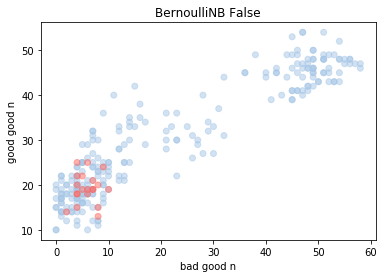

BernoulliNB True mean bad good n (x) 5.35
BernoulliNB True mean good good n (y) 18.65
BernoulliNB True good good / bad good n ratio 3.485981308411215


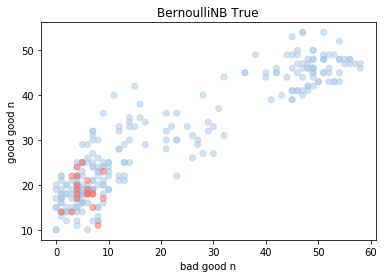

DecisionTreeClassifier mean bad good n (x) 25.2
DecisionTreeClassifier mean good good n (y) 30.6
DecisionTreeClassifier good good / bad good n ratio 1.2142857142857144


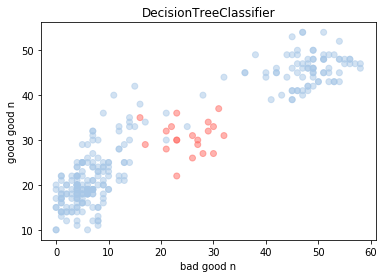

MultinomialNB False mean bad good n (x) 51.4
MultinomialNB False mean good good n (y) 46.45
MultinomialNB False good good / bad good n ratio 0.9036964980544748


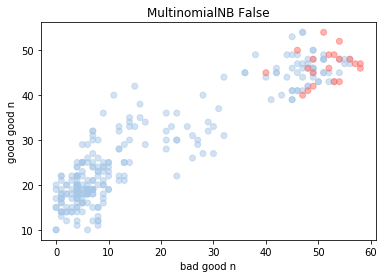

MultinomialNB True mean bad good n (x) 48.4
MultinomialNB True mean good good n (y) 45.8
MultinomialNB True good good / bad good n ratio 0.9462809917355371


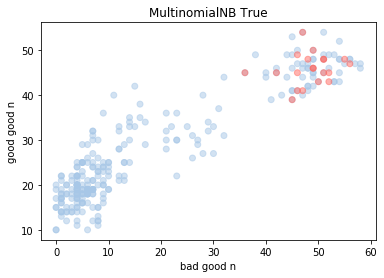

RandomForestClassifier mean bad good n (x) 4.6
RandomForestClassifier mean good good n (y) 16.65
RandomForestClassifier good good / bad good n ratio 3.619565217391304


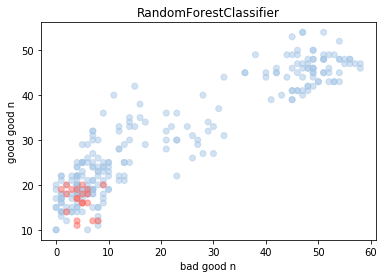

SGDClassifier mean bad good n (x) 14.8
SGDClassifier mean good good n (y) 33.35
SGDClassifier good good / bad good n ratio 2.2533783783783785


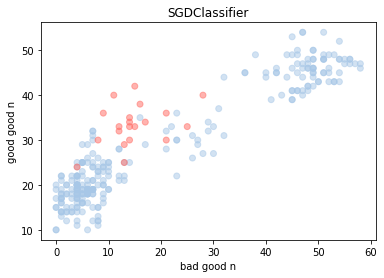

SVC mean bad good n (x) 1.1
SVC mean good good n (y) 16.75
SVC good good / bad good n ratio 15.227272727272727


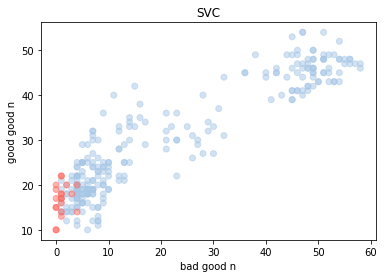

VotingClassifier (1) mean bad good n (x) 5.6
VotingClassifier (1) mean good good n (y) 19.25
VotingClassifier (1) good good / bad good n ratio 3.4375


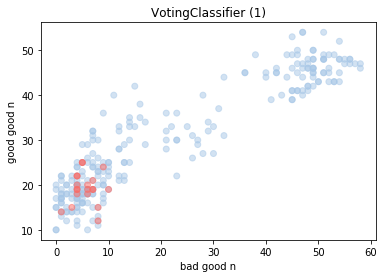

VotingClassifier (2) mean bad good n (x) 48
VotingClassifier (2) mean good good n (y) 45.8
VotingClassifier (2) good good / bad good n ratio 0.9541666666666666


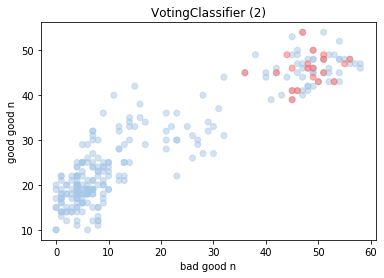

VotingClassifier (3) mean bad good n (x) 8.4
VotingClassifier (3) mean good good n (y) 24.45
VotingClassifier (3) good good / bad good n ratio 2.9107142857142856


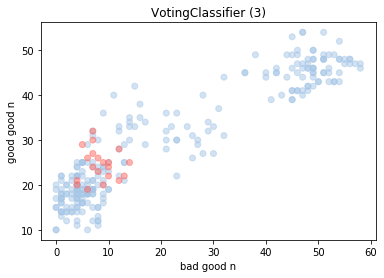

VotingClassifier (4) mean bad good n (x) 8.25
VotingClassifier (4) mean good good n (y) 23.7
VotingClassifier (4) good good / bad good n ratio 2.8727272727272726


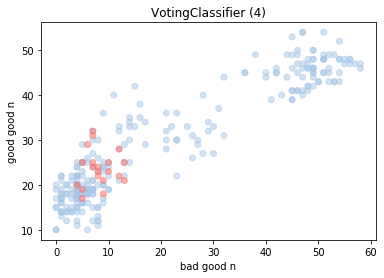

VotingClassifier (5) mean bad good n (x) 45.2
VotingClassifier (5) mean good good n (y) 45.15
VotingClassifier (5) good good / bad good n ratio 0.9988938053097344


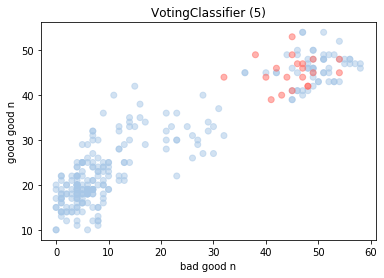

VotingClassifier (6) mean bad good n (x) 3.95
VotingClassifier (6) mean good good n (y) 16.75
VotingClassifier (6) good good / bad good n ratio 4.240506329113924


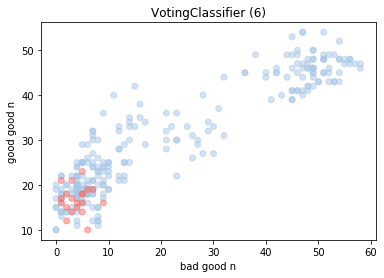

In [7]:
%matplotlib inline
import statistics
import matplotlib.pyplot as plt

classifier_names = []
for r in all_final_results:
    classifier_names.append(r['classifier'])

classifier_names = sorted(list(set(classifier_names)))

mean_data = []

for classifier_name in classifier_names:
    
    x = []
    y = []
    c = []
    
    match_x = []
    match_y = []
    
    for r in all_final_results:
        
        if r['classifier'] == classifier_name:
            pass
        else:
            try:
                x.append(r['bad good n'])
            except KeyError:
                x.append(0)
            try:
                y.append(r['good good n'])
            except KeyError:
                y.append(0)
            c.append('#A7C7E7')
    
    for r in all_final_results:
        
        if r['classifier'] == classifier_name:
            try:
                x.append(r['bad good n'])
                match_x.append(r['bad good n'])
            except KeyError:
                x.append(0)
                match_x.append(0)
            try:
                y.append(r['good good n'])
                match_y.append(r['good good n'])
            except:
                y.append(0)
                match_y.append(0)
            c.append('#ff6961')
        else:
            pass
        
    print(classifier_name, 'mean bad good n (x)', statistics.mean(match_x))
    print(classifier_name, 'mean good good n (y)', statistics.mean(match_y))
    print(classifier_name, 'good good / bad good n ratio', (statistics.mean(match_y) / statistics.mean(match_x)))
        
    mean_data.append({'run': '06', 'classifier_name': classifier_name, 
                          'false positive n': statistics.mean(match_x), 
                          'true positive n': statistics.mean(match_y),
                          'n true positive to false positive': (statistics.mean(match_y) / statistics.mean(match_x))})
        
        
    plt.scatter(x, y, c=c, alpha=0.5)
    plt.title(classifier_name)
    plt.xlabel('bad good n')
    plt.ylabel('good good n')
    
    plt.show()
    

In [8]:
import re, json

#print(re.sub('\}, ', '},\n', str(mean_data)) + ' \\ +')

f = open('06_mean_data.json', 'w', encoding='utf-8')
f.write(json.dumps(mean_data, indent=4))
f.close()

print('ok')

ok
